In [4]:
import sys
sys.path.append("../util/")

import numpy as np
import matplotlib.pyplot as plt

In [5]:
def support_vector_regression(dataset, C, epsilon=0.001, epochs=100):
    bias = 0.0
    betas = np.zeros(dataset.shape[0])
    count = 0
    numChanged = 0
    isReadyForNewLoop = True
    while ((count<epochs) and (isReadyForNewLoop or (numChanged>0))):
        numChanged = 0
        for i in range(dataset.shape[0]):
            if (isReadyForNewLoop or (np.fabs(betas[i])<C)):
                Ei = np.dot(betas, np.matmul(dataset[:, :2], dataset[i, :2]))+bias-dataset[i, 2]
                if (((np.fabs(Ei+epsilon)>0.00001) and ((betas[i]<C) and (betas[i]>=0))) or \
                    ((np.fabs(Ei-epsilon)>0.00001) and ((betas[i]>-C) and (betas[i]<=0)))):
                    maxDeltaE = 0.0
                    j = -1
                    for _j in range(dataset.shape[0]):
                        if (np.fabs(betas[_j])<0):
                            E = np.dot(betas, np.matmul(dataset[:, :2], dataset[_j, :2]))+bias-dataset[_j, 2]
                            deltaE = np.fabs(Ei-E)
                            if (deltaE>maxDeltaE):
                                j = _j
                                maxDeltaE = deltaE
                                Ej = E
                    if (j<0):
                        j = i
                        while (j==i):
                            j = np.random.randint(0, dataset.shape[0])
                        Ej = np.dot(betas, np.matmul(dataset[:, :2], dataset[j, :2]))+bias-dataset[j, 2]
                    eta = 2.0*np.dot(dataset[i, :2], dataset[j, :2]) \
                          -np.dot(dataset[i, :2], dataset[i, :2]) \
                          -np.dot(dataset[j, :2], dataset[j, :2])
                    if (eta>=0):
                        print("eta>=0")
                        continue
                    delta = (Ei-Ej)/eta
                    if (np.fabs(delta) < 0.00001):
                        print("not moving enough")
                        continue
                    betas[j] -= delta
                    if (betas[j]>C):
                        betas[j] = C
                    elif (betas[j]<-C):
                        betas[j] = -C
                    betas[i] += delta
                    bias1 = bias-Ei-delta*(np.dot(dataset[i, :2], dataset[i, :2])-np.dot(dataset[i, :2], dataset[j, :2]))
                    bias2 = bias-Ej-delta*(np.dot(dataset[i, :2], dataset[j, :2])-np.dot(dataset[j, :2], dataset[j, :2]))
                    if (0<betas[i]):
                        bias = bias1-epsilon
                    elif (0>betas[j]):
                        bias = bias2+epsilon
                    else:
                        bias = (bias1 + bias2)/2.0
                    numChanged += 1
            # print(betas)
        count += 1
        #print(numChanged)
        if isReadyForNewLoop:
            isReadyForNewLoop = False
        elif (numChanged==0):
            isReadyForNewLoop = True
    return bias, betas

[-1.38726138  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          1.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         

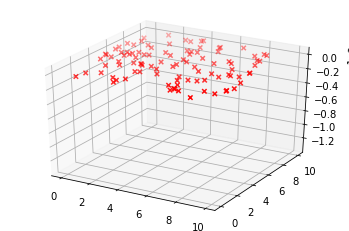

In [6]:
if __name__ == "__main__":
    from ipynb.fs.full.data_generator_2d import surface
    dataset = surface(100)
    C = 1.0
    b, betas = support_vector_regression(dataset, C)
    w = np.matmul(betas, dataset[:, :2])
    # print(b, w)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    ax.scatter(dataset[:, 0], dataset[:, 1], dataset[:, 2], c="r", marker="x")
    sv = dataset[np.nonzero(np.fabs(betas)<C)]
    # print(sv.shape)
    ax.scatter(sv[:, 0], sv[:, 1], sv[:,2], color="white", edgecolors="y", marker="o", s=100)
    x = np.arange(0, 10, 0.25)
    y = np.arange(0, 10, 0.25)
    desired = np.zeros((y.shape[0], x.shape[0]))
    for i in range(x.shape[0]):
        for j in range(y.shape[0]):
            desired[j, i] = np.dot(betas[np.nonzero(np.fabs(betas)<C)], np.matmul(sv[:, :2], np.array([x[i], y[j]])))+b
    ax.plot_surface(x, y, desired)
    plt.show()